In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns

In [217]:
data = load_iris();

## Logistic Regression prediction using multi-class

In [227]:
trainX,testX,trainy,testy = train_test_split(data.data,data.target,random_state=5);
logisticClassifier = LogisticRegression(solver="lbfgs",multi_class='ovr').fit(trainX,trainy);
logisticPrediction = logisticClassifier.predict(testX);
print(logisticClassifier.coef_);
logisticPrediction

[[-0.43625789  0.8384777  -2.14722905 -0.92381645]
 [ 0.1406226  -2.11979714  0.5667493  -1.27220805]
 [-0.53032001 -0.28348816  2.62741535  2.30874332]]


array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

## KNN Prediction

In [219]:
knnClassifier = KNeighborsClassifier(n_neighbors=3).fit(trainX,trainy);
knnPrediction = knnClassifier.predict(testX);
knnPrediction

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

## Compare both predications

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
0.9736842105263158


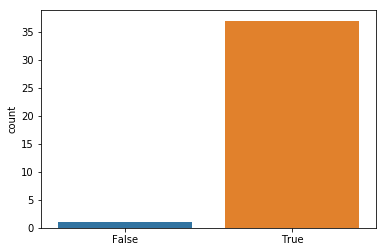

In [220]:
result = logisticPrediction == knnPrediction;
print(result);
print(np.mean(result));
sns.countplot(result);

## Multi Class prediction using binary Logistic Regression (one vs rest)

In [221]:
from sklearn.utils import shuffle;
irisData = pd.DataFrame(data.data,columns=data.feature_names);
irisData["type"] = data.target;
irisData = pd.get_dummies(irisData,columns=['type']);
irisData = shuffle(irisData);
irisData.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_0,type_1,type_2
61,5.9,3.0,4.2,1.5,0,1,0
68,6.2,2.2,4.5,1.5,0,1,0
124,6.7,3.3,5.7,2.1,0,0,1
143,6.8,3.2,5.9,2.3,0,0,1
40,5.0,3.5,1.3,0.3,1,0,0


In [222]:
## Classifier for type_0
X = irisData.loc[:,['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].values;
y = irisData.loc[:,'type_0'].values;
trainX = X[:100];
trainy = y[:100];
testy = y[100:154];
classifier0 = LogisticRegression(solver="lbfgs").fit(trainX,trainy);


In [223]:
## Classifier for type_1
y = irisData.loc[:,'type_1'].values;
trainy = y[:100];
testy = y[100:154];
classifier1 = LogisticRegression(solver="lbfgs").fit(trainX,trainy);


In [224]:
## Classifier for type_2
y = irisData.loc[:,'type_2'].values;
trainy = y[:100];
classifier2 = LogisticRegression(solver="lbfgs").fit(trainX,trainy);

In [225]:
testX = X[100:150];
predict0 = classifier0.predict(testX);
predict1 = classifier1.predict(testX);
predict2 = classifier2.predict(testX);
result = pd.DataFrame({0:predict0,1:predict1,2:predict2});
oneVsRestResult = np.where(result[0]==1, 0, np.where(result[1]==1, 1,2))
result["result"] = oneVsRestResult;
result.head()

,0,1,2,result
0,0,0,0,2
1,1,0,0,0
2,0,0,1,2
3,0,1,0,1
4,0,0,0,2


## Result comparsion

In [226]:
wrongEntries = np.sum(np.logical_or(result[0]+result[1]+result[2] > 1,result[0]+result[1]+result[2] == 0));
print("{} entires are wrong".format(wrongEntries));
print(wrongEntries/result[0].shape);

logisticResult =logisticClassifier.predict(testX);
print("Error :- {}".format(np.mean(logisticResult != oneVsRestResult)));
logisticResult

9 entires are wrong
[0.18]
Error :- 0.16


array([1, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 0,
       2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 2, 0])